# __Hotel Booking Prediction Project__
---


## INTRODUCTION



Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?  

In this project, we will answer all these questions by doing some EDA and building predictive models.  

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

## DATA IMPORTING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sort_dataframeby_monthorweek as sd
import warnings
from warnings import filterwarnings

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix # Evaluation Metric
from sklearn.metrics import accuracy_score # Evaluation Metric
from sklearn.metrics import plot_confusion_matrix #Draw the metric

In [3]:
df = pd.read_csv("D:/ML_Hotel_Booking/hotel_bookings.csv")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
print('This DataFrame has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

This DataFrame has 119390 rows and 32 columns.


## DATA CLEANING

In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We will fill all the missing values by 0 since it is all about *Not any information* provided and it means there is a high probability that booking will be done using some private mode.

In [6]:
def clean_data(df): 
    df.fillna(0,inplace=True)
    print(df.isna().sum())

In [7]:
clean_data(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
#Check amounts of adults, children and babies
list = ["adults", "children", "babies"]
for i in list:
    print("{} has unique values as {}".format(i,df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


> There might be some inconsistency in the data since the amounts of adults, children and babies can not be **"zero"** at the same time.

In [10]:
filter=((df["adults"]==0) & (df["children"]==0) & (df["babies"]==0))
df[filter].shape

(180, 32)

In [11]:
data = df[~filter]

In [12]:
data.shape

(119210, 32)

In [13]:
pd.set_option('display.max_columns',32)
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## EXPLANATORY DATA ANALYSIS

Let's try answering some of these interesting questions below using EDA.

### How much do guests pay a night for each room type?

Both hotels have different room types and different meal arrangements. Seasonal factors are also important. Therefore, the prices vary a lot.  
  
Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [17]:
uncanceled_data = data[data["is_canceled"]==0]

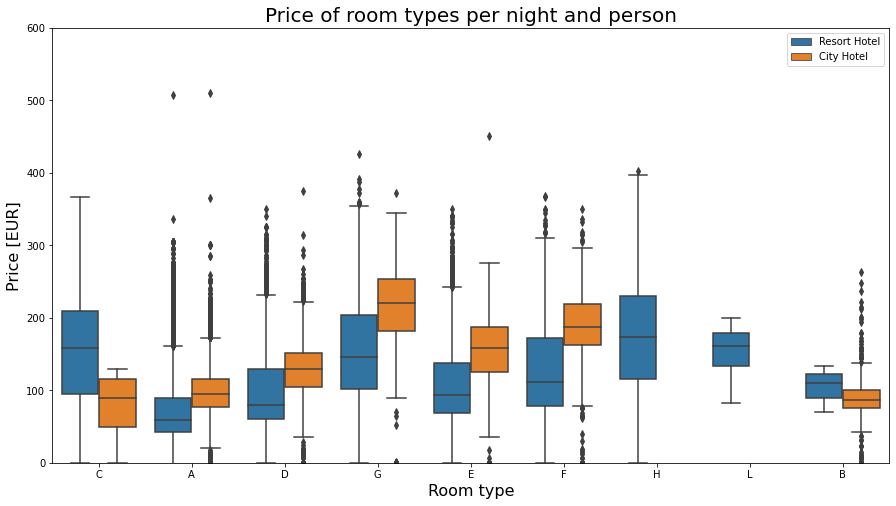

In [18]:
#Boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x="reserved_room_type",
           y="adr",
           hue="hotel",
           data=uncanceled_data)
plt.title("Price of room types per night and person", fontsize=20)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

> This figure shows the average price per room, depending on its type and the standard deviation.   
Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

### How does the price per night vary over the year?

In [19]:
data_resort = uncanceled_data[uncanceled_data["hotel"]=="Resort Hotel"]
data_city = uncanceled_data[uncanceled_data["hotel"]=="City Hotel"]
data_resort.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [20]:
hotel_resort = data_resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()
hotel_resort

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [21]:
hotel_city = data_city.groupby(["arrival_date_month"])["adr"].mean().reset_index()
hotel_city

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [22]:
#Merge data for comparison
merge_data = hotel_resort.merge(hotel_city, on="arrival_date_month")
merge_data.columns = ["Month", "Price of Resort Hotel", "Price of City Hotel"]
merge_data

,Month,Price of Resort Hotel,Price of City Hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


Noticed that months are not in order so if we visualize it we will get improper conclusion. Therefore, we will try to reorder the months. 

In [23]:
def sort_data(df, colname):
    df = sd.Sort_Dataframeby_Month(df,colname)
    return df
sorted_data = sd.Sort_Dataframeby_Month(merge_data, "Month")
sorted_data

,Month,Price of Resort Hotel,Price of City Hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


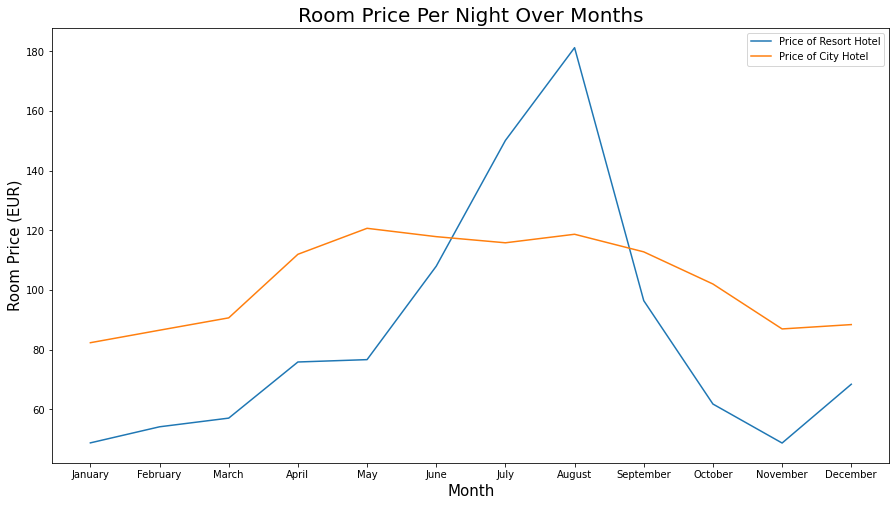

In [71]:
plt.figure(figsize=(15,8))
plt.plot(sorted_data["Month"],sorted_data["Price of Resort Hotel"], label="Price of Resort Hotel")
plt.plot(sorted_data["Month"],sorted_data["Price of City Hotel"], label="Price of City Hotel")
plt.title("Room Price Per Night Over Months",fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Room Price (EUR)",fontsize=15)
plt.legend()

> We can easily conclude that price of Resort Hotel is much higher during the Summer.  
While the price of City Hotel varies less and be most expensive during the Summer and Autumn. 

### Which are the busiest months?

In [25]:
resort_arrivals = data_resort["arrival_date_month"].value_counts().reset_index()
resort_arrivals.columns = ["Month", "Arrival_Per_Month"]
resort_arrivals = sort_data(resort_arrivals, "Month")
resort_arrivals

,Month,Arrival_Per_Month
0,January,1866
1,February,2308
2,March,2571
3,April,2550
4,May,2535
5,June,2037
6,July,3137
7,August,3257
8,September,2102
9,October,2575


In [26]:
city_arrivals = data_city["arrival_date_month"].value_counts().reset_index()
city_arrivals.columns = ["Month", "Arrival_Per_Month"]
city_arrivals = sort_data(city_arrivals, "Month")
city_arrivals

,Month,Arrival_Per_Month
0,January,2249
1,February,3051
2,March,4049
3,April,4010
4,May,4568
5,June,4358
6,July,4770
7,August,5367
8,September,4283
9,October,4326


In [27]:
hotel_arrivals = resort_arrivals.merge(city_arrivals, on="Month")
hotel_arrivals.columns = ["Month", "Arrivals at Resort Hotel", "Arrivals at City Hotel"]
hotel_arrivals

,Month,Arrivals at Resort Hotel,Arrivals at City Hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


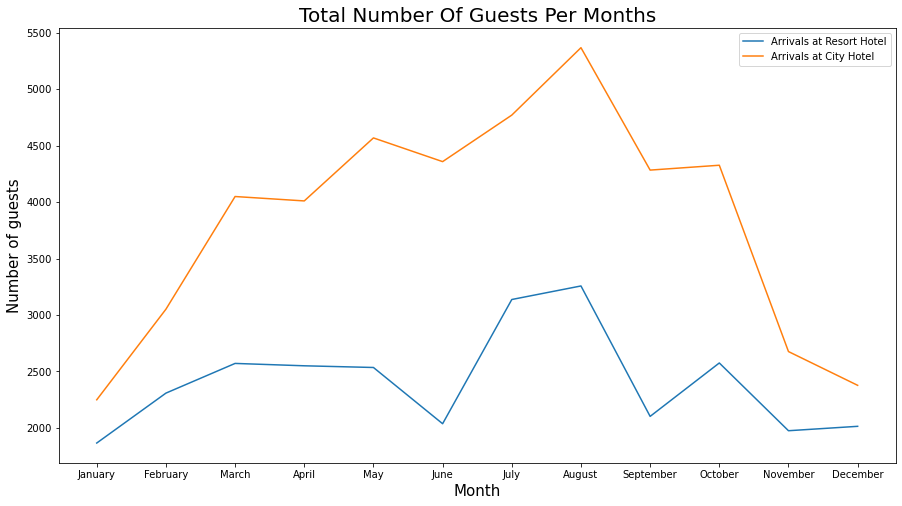

In [70]:
plt.figure(figsize=(15,8))
plt.plot(hotel_arrivals["Month"],hotel_arrivals["Arrivals at Resort Hotel"], label="Arrivals at Resort Hotel")
plt.plot(hotel_arrivals["Month"],hotel_arrivals["Arrivals at City Hotel"], label="Arrivals at City Hotel")
plt.title("Total Number Of Guests Per Months",fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of guests",fontsize=15)
plt.legend()

    We can see that the City Hotels has more guests during Summer and Autumn when the prices are also the highest.
    
    Similarly, the most busiest months of Resort Hotel are July and August when the prices are very high as well. 
    
    Both kinds of hotel have fewer guests in Spring and Winter.  
    
    All in all, the number of guests of City Hotel is much higher than Resort Hotel's.


# Feature Engineering


### Feature Selection

Since we are building models to predict booking is cancel or not, we will select important features using correlation between "is_canceled" and other features.

In [29]:
data.corr()["is_canceled"]

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [30]:
correlation = data.corr()["is_canceled"].abs().sort_values(ascending=False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [31]:
correlation[1:]

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [32]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

    It is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the top 5 important numerical features.
    
    However, to predict whether or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.
    
    We will also not include days_in_waiting_list and arrival_date_year.

    The most important feature to exclude is the "reservation_status":

In [33]:
data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [34]:
excluded_num = ["days_in_waiting_list", "arrival_date_year"]

In [35]:
num_features = [col for col in data.columns if data[col].dtype!='O' and col not in excluded_num]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [36]:
excluded_cat = ["assigned_room_type", "arrival_date_year",'booking_changes', 'reservation_status', 'country','days_in_waiting_list']

In [37]:
cat_features = [col for col in data.columns if data[col].dtype=="O" and col not in excluded_cat]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [38]:
data_cat = data[cat_features]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [39]:
data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])
filterwarnings("ignore")
data_cat.dtypes

<ipython-input-39-291b49c818e5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hotel                              object
arrival_date_month                 object
meal                               object
market_segment                     object
distribution_channel               object
reserved_room_type                 object
deposit_type                       object
customer_type                      object
reservation_status_date    datetime64[ns]
dtype: object

In [40]:
data_cat['year'] = data_cat["reservation_status_date"].dt.year
data_cat['month'] = data_cat["reservation_status_date"].dt.month
data_cat['day'] = data_cat["reservation_status_date"].dt.day
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [41]:
data_cat.drop("reservation_status_date",axis=1,inplace=True)

In [42]:
data_cat["cancellation"] = data["is_canceled"]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


### Feature Encoding

> In this part, we will try to encode all the categorical features into numerial ones in order for our ML models to handle easily.

In [43]:
cols = data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [44]:
for col in cols:
    print(data_cat.groupby([col])["cancellation"].mean())
    print("\n")

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64


meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64


market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64


distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64


reserve

In [45]:
for col in cols:
    dict_data = data_cat.groupby([col])["cancellation"].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict_data)

data_cat.head(20)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0
5,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0
6,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,3,0
7,0.277674,0.374644,0.598997,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,3,0
8,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,5,6,1
9,0.277674,0.374644,0.344653,0.343313,0.410598,0.318108,0.28402,0.407864,2015,4,22,1


In [46]:
dataframe = pd.concat([data_cat, data[num_features]], axis=1)

In [47]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [48]:
#Remove the cancellation column
dataframe.drop(["cancellation"],axis=1, inplace=True)

In [49]:
dataframe.shape

(119210, 29)

### Outliers Handling

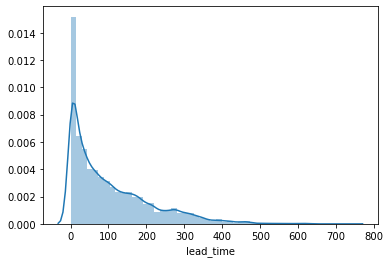

In [115]:
#Display distribution of lead_time
sns.distplot(dataframe["lead_time"])

In [116]:
def handle_outliers(col):
    dataframe[col] = np.log1p(dataframe[col])
handle_outliers("lead_time")

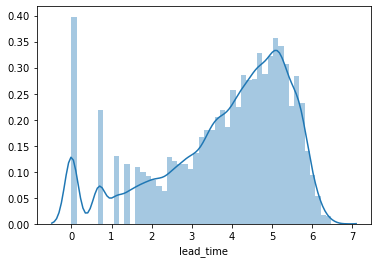

In [117]:
sns.distplot(dataframe["lead_time"].dropna())

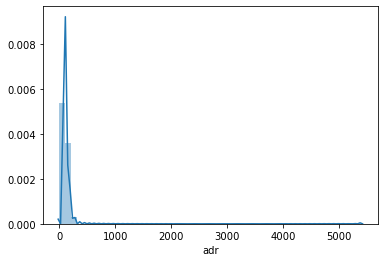

In [118]:
#Display distribution of lead_time
sns.distplot(dataframe["adr"])

In [119]:
handle_outliers("adr")

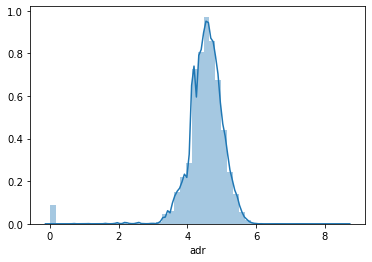

In [120]:
sns.distplot(dataframe["adr"].dropna())

In [121]:
#Check if dataframe has null values or not
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [122]:
dataframe.dropna(inplace=True)

In [123]:
#Separate dependent feature and independent features
y = dataframe["is_canceled"]
X = dataframe.drop("is_canceled",axis=1)

### Feature Importance

In [124]:
# Select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [125]:
# Remove unimportant features
imp_features = X.columns[feature_sel_model.get_support()]
X = X[imp_features]

# Modeling

### __Splitting data into training and validation set__

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)

### Building Models

LR:  0.8036596597580911 0.004225909074900972
KNN:  0.9447687287305021 0.002737130850258142
RF:  0.9534930142342531 0.0011944996992197783
CART:  0.943706185240704 0.0033141224813960255
NB:  0.6215803363686427 0.0056433781248829


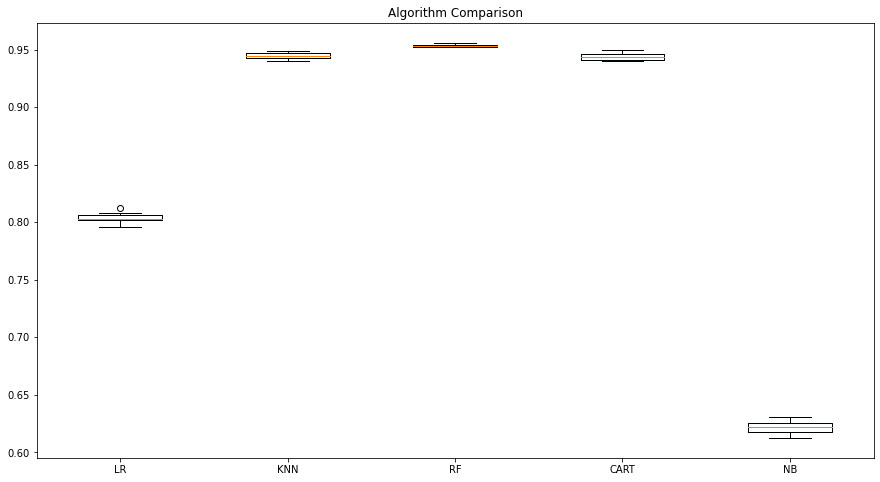

In [65]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn using cross-validation
results, names = [], []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
	model_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(model_results)
	names.append(name)
	print(name + ": ", model_results.mean(), model_results.std())

#Compare algorithms using boxplots
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

It turns out **Random Forest**,**KNN** and **Decision Tree** algorithms have the highest accuracy scores and small standard deviations when fitting the models into training set.

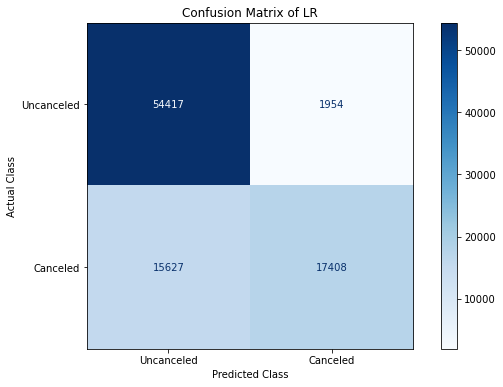

Accuracy score of LR: 0.802167567023454


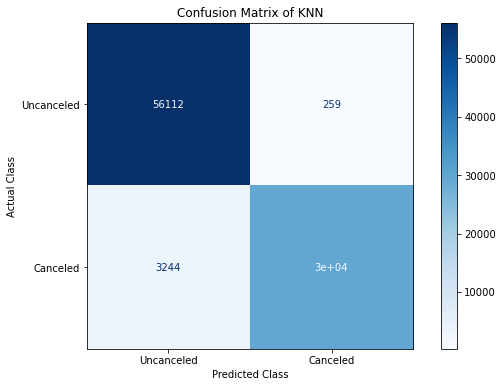

Accuracy score of KNN: 0.9464818977955239


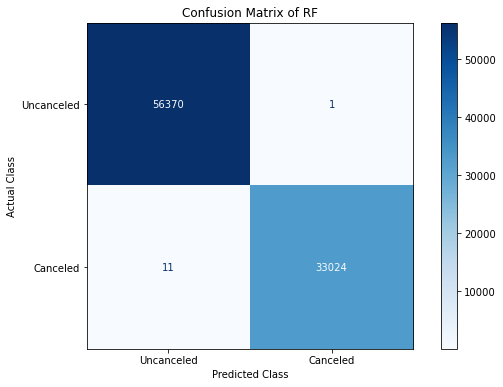

Accuracy score of RF: 0.9540314733416099


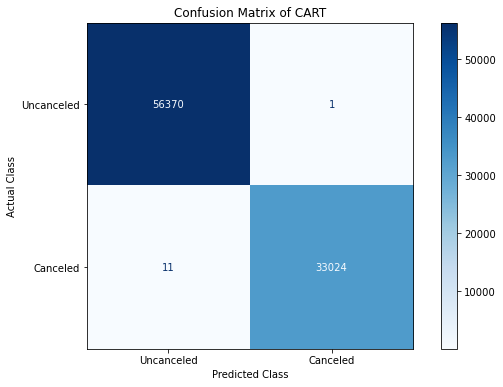

Accuracy score of CART: 0.9439653726134953


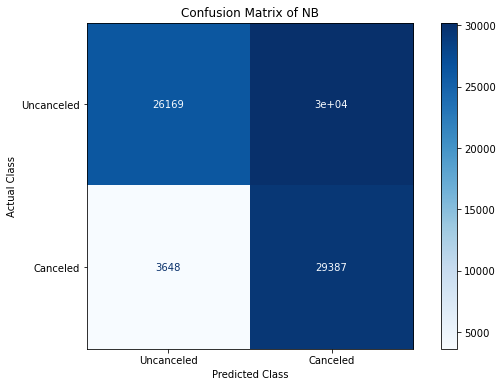

Accuracy score of NB: 0.6193336241317988


In [66]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    class_names = ['Uncanceled', 'Canceled'] 
    matrix = plot_confusion_matrix(model, X_train, y_train, display_labels=class_names, cmap=plt.cm.Blues)
    title = 'Confusion Matrix of ' + name 
    matrix.ax_.set_title(title, color='black')
    plt.xlabel('Predicted Class', color='black')
    plt.ylabel('Actual Class', color='black')
    plt.gcf().axes[0].tick_params(color='black')
    plt.gcf().axes[1].tick_params(color='black')
    plt.gcf().set_size_inches(10,6)
    plt.show()
    
    print("Accuracy score of {}: {}".format(name, accuracy_score(y_test, predictions)))

As we can see, **Random Forest**,**KNN** and **Decision Tree** are by far the best models with highest accuracy scores based on our test set.  

It means that those three algorithms perform very well on this dataset without any sign of overfitting.

## References

- Machine Learning Real World Projects - Udemy
- Kaggle Dataset - https://www.kaggle.com/jessemostipak/hotel-booking-demand

# Thank you for your attention!